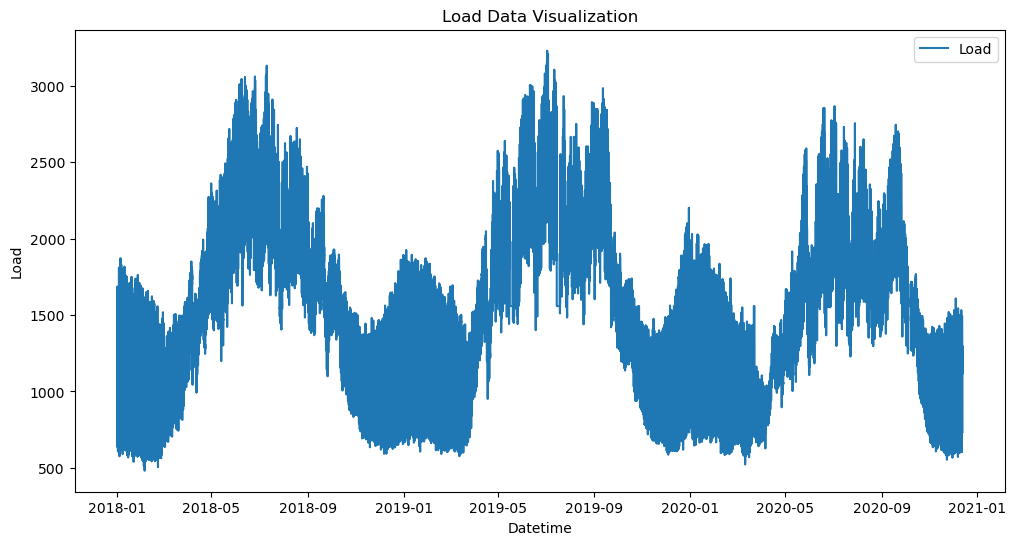


Synopsis:
1. Loaded the dataset and parsed the 'datetime' column.
2. Handled missing values in the 'load' column using mean imputation.
3. Used the Holt-Winters model for forecasting with seasonality and trend components.
4. Forecasted the load values for December 14, 2020, at 15-minute intervals.
5. Saved the results as a CSV file: forecast_submission.csv.



In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data
data_path = 'assignment-data.csv'  
data = pd.read_csv(data_path)

# Ensure the datetime column is a datetime object
data['datetime'] = pd.to_datetime(data['datetime'])

# Set datetime as the index
data.set_index('datetime', inplace=True)

# Assign the frequency explicitly
data.index.freq = '15min'

# Handle NaN values in the 'load' column using mean imputation
data['load'] = SimpleImputer(strategy='mean').fit_transform(data[['load']])

# Visualize the data (Optional)
plt.figure(figsize=(12, 6))
plt.plot(data['load'], label='Load')
plt.title('Load Data Visualization')
plt.xlabel('Datetime')
plt.ylabel('Load')
plt.legend()
plt.show()

# Check if December 14, 2020, is within the range
start_date = '2020-12-14 00:00:00'
end_date = '2020-12-14 23:59:59'
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='15min')

# Train a time series model on the available data
train_data = data.loc[data.index < start_date]

# Initialize and fit the Holt-Winters model with boxcox transformation and bias removal
try:
    model = ExponentialSmoothing(
        train_data['load'], 
        seasonal='add', 
        seasonal_periods=96,  # 96 periods for 15-min intervals in a day
        trend='add',
        use_boxcox=True,  # Box-Cox transformation
        initialization_method='estimated'  # Set initialization explicitly
    ).fit(optimized=True, remove_bias=True)
except Exception as e:
    print("Error fitting the model:", e)
    raise

# Forecast for December 14, 2020
forecast = model.forecast(len(forecast_dates))
forecast_df = pd.DataFrame({'datetime': forecast_dates, 'forecasted_load': forecast.values})


# Synopsis
print(f"""
Synopsis:
1. Loaded the dataset and parsed the 'datetime' column.
2. Handled missing values in the 'load' column using mean imputation.
3. Used the Holt-Winters model for forecasting with seasonality and trend components.
4. Forecasted the load values for December 14, 2020, at 15-minute intervals.
5. Saved the results as a CSV file: {forecast_csv_path}.
""")


In [2]:
# Save the forecasted results to a CSV file
forecast_csv_path = 'forecast_submission.csv'
forecast_df.to_csv(forecast_csv_path, index=False)
